Author: Carlos Roberto de Melo
    
Date: 08/10/2020
    
Obj: Modelar os arcos em ESO325 como um _EllipticalIsothermal_ (SIE) MassProfile. A fonte será obtida a partir da inversão em uma grid regular. 

In [1]:
#Pacotes necessários/úteis

from autoconf import conf
import autofit as af  # <- This library is used for non-linear fitting.
import autolens as al
import autolens.plot as aplt


from time import perf_counter as clock

from astropy.cosmology import Planck15 as cosmo
from astropy.constants import G, M_sun, c
import astropy.units as u
import numpy as np

In [2]:
#Configrando workspace e output files
from pyprojroot import here

workspace_path = str(here())
print("Workspace Path: ", workspace_path)

conf.instance = conf.Config(
    config_path=f"{workspace_path}/howtolens/config",
    output_path=f"{workspace_path}/ESO325/Output/Arcs/Rectangular",
)

Workspace Path:  /home/carlos/autolens_workspace


In [4]:
#Reading data

dataset_type = "ESO325"
dataset_name = "Data"
dataset_path = f"{workspace_path}/{dataset_type}/{dataset_name}"

imaging = al.Imaging.from_fits(
    image_path=f"{dataset_path}/arcs_resized.fits",
    noise_map_path=f"{dataset_path}/noise_map_resized.fits",
    psf_path=f"{dataset_path}/psf.fits",
    pixel_scales=0.04,
)

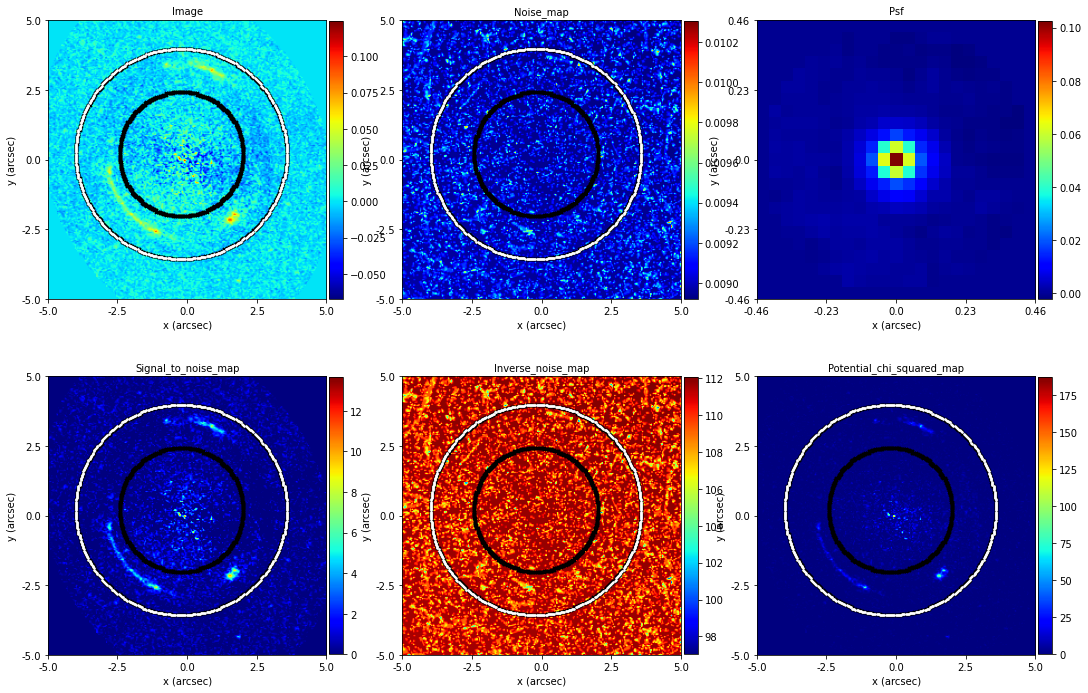

In [15]:
#Criando uma máscara e plotando tudo junto

mask = al.Mask.circular_annular(
    shape_2d=imaging.shape_2d, 
    pixel_scales=imaging.pixel_scales, 
    sub_size=1,
    inner_radius=2.2,
    outer_radius=3.8, 
    centre=(0.2, -0.2)

)

masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask)

aplt.Imaging.subplot_imaging(
    imaging=imaging, mask=mask, include=aplt.Include(border=True),
)


In [17]:
settings = al.PhaseSettingsImaging(grid_class=al.Grid, sub_size=1)

In [18]:
#Defindo os parâmetros da lente

lens_galaxy=al.GalaxyModel(redshift=0.035, mass=al.mp.EllipticalIsothermal)

#Componentes do perfil de matéria
lens_galaxy.mass.einstein_radius = af.GaussianPrior(mean=2.95, sigma=0.5, lower_limit=0.0, upper_limit=np.inf)
print(lens_galaxy.mass.info)

centre
    centre_0                                                                              GaussianPrior, mean = 0.0, sigma = 0.3
    centre_1                                                                              GaussianPrior, mean = 0.0, sigma = 0.3
elliptical_comps
    elliptical_comps_0                                                                    UniformPrior, lower_limit = -1.0, upper_limit = 1.0
    elliptical_comps_1                                                                    UniformPrior, lower_limit = -1.0, upper_limit = 1.0
einstein_radius                                                                           GaussianPrior, mean = 2.95, sigma = 0.5


In [19]:
phase = al.PhaseImaging(
        phase_name="ESO325_sie",
        galaxies=dict(
            lens=lens_galaxy,
            source=al.GalaxyModel(redshift=2.1, pixelization=al.pix.Rectangular(shape=(25,25)), regularization=al.reg.Constant),
        ),
        settings=settings,
        search=af.DynestyStatic(n_live_points=50),
    )

In [20]:
result =  phase.run(dataset=imaging, mask=mask)

INFO:root:Generating initial samples of model, which are subject to prior limits and other constraints.
INFO:root:No Dynesty samples found, beginning new non-linear search. 
177it [10:56,  2.26s/it, bound: 4 | nc: 5 | ncall: 1676 | eff(%): 10.561 | loglstar:   -inf < 63425.755 <    inf | logz: 63418.450 +/-  0.525 | dlogz: 489.128 >  0.059] /home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
218it [13:06,  2.42s/it, bound: 12 | nc: 5 | ncall: 1986 | eff(%): 10.977 | loglstar:   -inf < 63540.730 <    inf | logz: 63532.161 +/-  0.558 | dlogz: 375.005 >  0.059] /home/carlos/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appea